<a href="https://colab.research.google.com/github/lowvey/CCADMACL_EXERCISES_COM232/blob/main/Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/IMF_advanced_economies_and_UN_least_developed_countries.svg/960px-IMF_advanced_economies_and_UN_least_developed_countries.svg.png"/>

## Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [ ]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [ ]:
print(df.shape)

(167, 10)


Show summary statistics using `describe()`. `(5 pts)`

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [ ]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [ ]:
df_numerical = df.select_dtypes(include=[np.number])
print(df_numerical)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89 

Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [ ]:
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)
print(df_numerical_scaled)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

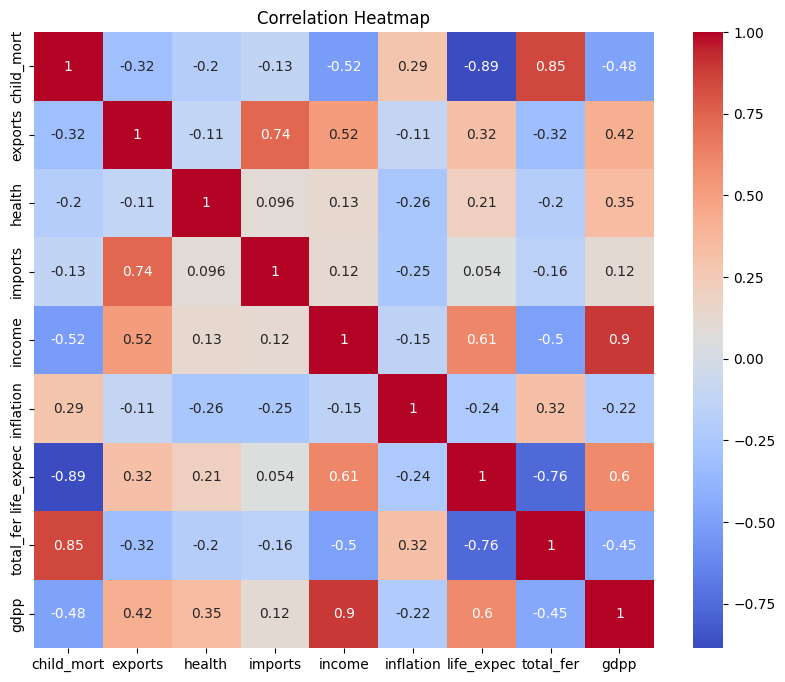

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

The income and gdpp
appear strongly correlated, with a value of 0.9.

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

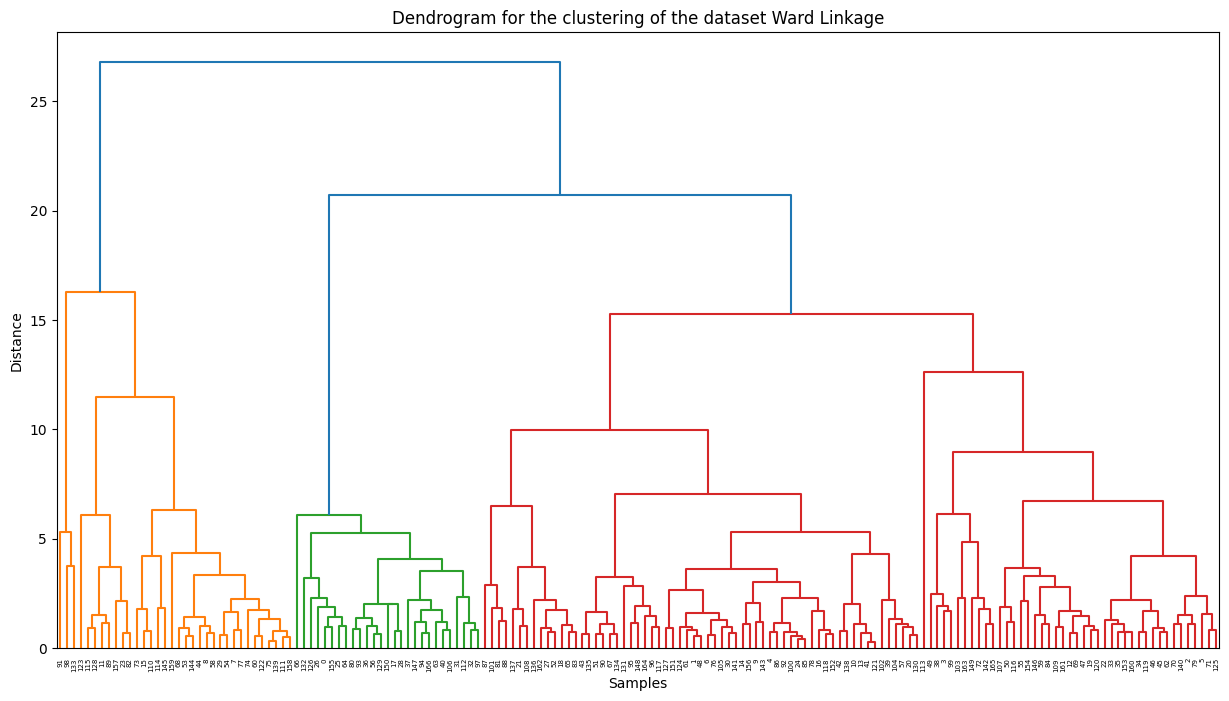

In [ ]:
z = sch.linkage(df_numerical_scaled, method='ward')
plt.figure(figsize=(15, 8))
den = sch.dendrogram(z)
plt.title('Dendrogram for the clustering of the dataset Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

 Looking at the dendrogram, there are three merges that happen only at high distances, which suggests the data naturally splits into three main clusters. So, cutting the tree just below those big jumps gives us three labeled groups.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [ ]:
features_to_use = ['income', 'gdpp']
X = df_numerical_scaled[features_to_use]

cluster_H = AgglomerativeClustering(n_clusters=3, linkage='ward')
model_clt = cluster_H.fit(X)
df_numerical['clusters'] = model_clt.labels_

print(model_clt)
print(df_numerical)
print('\n')
print('Clusters assigned to each datapoints, cluster = 3:')
print(df_numerical_scaled['clusters'])

AgglomerativeClustering(n_clusters=3)
     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  clusters  
0         5.82 

## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

Text(0.5, 1.0, 'Scatter Plot of income vs. gdpp')

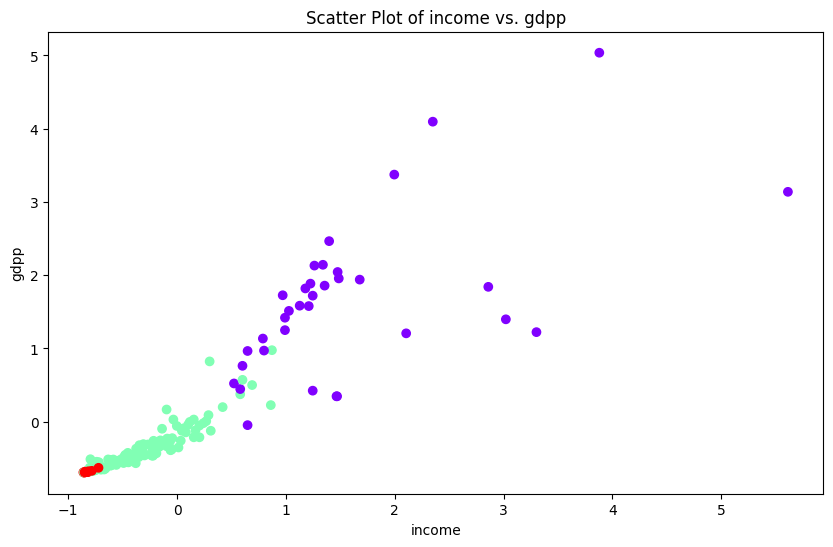

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_numerical_scaled['income'], df_numerical_scaled['gdpp'], c=df_numerical_scaled['clusters'], cmap='rainbow')
plt.xlabel('income')
plt.ylabel('gdpp')
plt.title('Scatter Plot of income vs. gdpp')

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

The scatter plot shows three groups of countries based on their income and gdpp. The red color group has low income and low gdpp, the green color group has average income and average gdpp, and the purple color group has high income and high gdpp. This suggests that countries with higher income generally have higher gdpp, meaning richer countries tend to be more economically developed.

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


Hierarchical clustering showed clear patterns in global development. Countries grouped into three clusters, with low, average, and high income and GDPP, showing that richer countries tend to be more economically productive. This suggests a strong link between a country's wealth and its overall development.